# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Run a complete regression analysis using python

## The formulas

** Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

** R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [6]:
import numpy as np
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

X = np.array([1,2,3,4,5,6,7,8,9,10], dtype=np.float64)
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)

def slope(X,Y):
    mean_x = np.mean(X)
    mean_y = np.mean(Y)
    mean_xy = np.dot(X,Y)/float(len(X))
    mean_x_sq = mean_x**2
    mean_of_x_sq = np.mean(X**2)
    return (mean_x*mean_y-mean_xy)/(mean_x_sq-mean_of_x_sq)

def intercept(X,Y):
    return np.mean(Y)-slope(X,Y)*np.mean(X)

def predict(x_new,X,Y):
    m = slope(X,Y)
    c = intercept(X,Y)
    return m*x_new+c

def r_squared(x_new,X,Y):
    predicted = predict(x_new,X,Y)
    return 1-np.sum((Y-predicted)**2)/np.sum((Y-np.mean(Y))**2)

m = slope(X,Y)
c = intercept(X,Y)
rsq = r_squared(X,X,Y)
print(f"Slope: {m}")
print(f"Y-intercept: {c}")
print(f"R-squared: {rsq}")
print(f"Model: Y = {m}*X+{c}")

Slope: 0.5575757575757568
Y-intercept: 6.3333333333333375
R-squared: 0.9715335169880626
Model: Y = 0.5575757575757568*X+6.3333333333333375


In [7]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

In [9]:
# Make prediction using given value and visualize on the scatter plot
x_new = 4.5
predicted_y = predict(x_new,X,Y)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

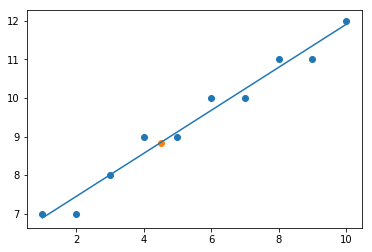

In [13]:
plt.scatter(X,Y)
plt.plot(X,predict(X,X,Y))
plt.scatter(x_new,predicted_y)

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use python's built-in modules to perform similar analyses with a much higher level of sophistication. 

r_squared: 0.9553099288673668


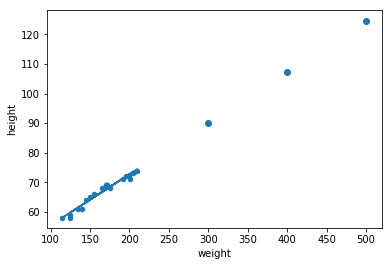

In [17]:
import pandas as pd
df = pd.read_csv("heightWeight.csv")
df.plot.scatter("weight","height")
plt.plot(df["weight"],predict(df["weight"], df["weight"], df["height"]))
rsq = r_squared(df["weight"], df["weight"], df["height"])
print(f"r_squared: {rsq}")
weights_to_predict = np.array([120, 130, 140])
predicted_heights = predict(weights_to_predict, df["weight"], df["height"])
plt.scatter(weights_to_predict, predicted_heights, c='')